In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitudes and longitude combinations
lats = np.random.uniform(-90.000,90.000,1500)
longs = np.random.uniform(-180.000,180.000,1500)

In [3]:
# Combine both arrays
lats_longs = zip(lats,longs)
lats_longs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_longs)


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
# city_name and country_code can be used to get the cities and their country code
# for cord in coordinates:
#     print(citipy.nearest_city(cord[0],cord[1]).city_name,
#           citipy.nearest_city(cord[0],cord[1]).country_code)

In [6]:
# Creating a list for holding cities
cities = []
for cord in coordinates:
    city = citipy.nearest_city(cord[0],cord[1]).city_name

    # Check for duplicates
    if city not in cities:
        cities.append(city)

# Get length of city list
len(cities)

593

In [7]:
# Import requests library
import requests

# Import Weather API Key
from config import weather_api_key

# Import datetime
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bcfac3e9a2d3bf370c85f3c6a2d81071


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bcfac3e9a2d3bf370c85f3c6a2d81071&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get JSON text of the Get request
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 54.95,
  'feels_like': 50.86,
  'temp_min': 52,
  'temp_max': 57.99,
  'pressure': 1024,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 190},
 'clouds': {'all': 20},
 'dt': 1604818393,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604834816,
  'sunset': 1604870951},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f'City Weather found')
else:
    print(f'City Weather not found.')

City Weather found


In [13]:
# Get the JSON
boston_data = city_weather.json()
country = boston_data['sys']['country']
city = boston_data['name']
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']

In [14]:
print(country, city, lat, lng, max_temp, humidity, clouds, wind)

US Boston 42.36 -71.06 57.99 66 20 4.7


In [15]:
# Get the date from the weather
date = boston_data['dt']

# convert UTC date to date format year, month, day, hour, minute, second
# date = datetime.utcfromtimestamp(date)

date = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

# date

In [37]:
# Create an empty ;list to hold the data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter
record_count = 1
set_count = 1

# loop through all the cities
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50 ):
        set_count += 1
        record_count = 1

    city_url = url + "&q=" + city.replace(" ", "+")

    # Logging the URL, record number, set number and city
    print(f'Processing record {record_count} of Set {set_count} | {city}')
    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({'City': city.title(),
            'Latitude': city_lat,
            'Longitude': city_lng,
            'Humidity': city_humidity,
            'Cloudiness': city_clouds,
            'Max Temperature': city_max_temp,
            'Winds': city_wind,
            'Country': city_country,
            'Date': city_date
        })
    except:
        print(f'The City {city} not Found. Skipping .....')

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | hambantota
Processing record 2 of Set 1 | provideniya
Processing record 3 of Set 1 | hue
Processing record 4 of Set 1 | bluff
Processing record 5 of Set 1 | la ronge
Processing record 6 of Set 1 | kasempa
Processing record 7 of Set 1 | sioux lookout
Processing record 8 of Set 1 | sitka
Processing record 9 of Set 1 | yangjiang
Processing record 10 of Set 1 | ushuaia
Processing record 11 of Set 1 | puerto ayora
Processing record 12 of Set 1 | yellowknife
Processing record 13 of Set 1 | deputatskiy
Processing record 14 of Set 1 | busselton
Processing record 15 of Set 1 | tuktoyaktuk
Processing record 16 of Set 1 | butaritari
Processing record 17 of Set 1 | yulara
Processing record 18 of Set 1 | lompoc
Processing record 19 of Set 1 | barrow
Processing record 20 of Set 1 | bull savanna
Processing record 21 of Set 1 | flinders
Processing record 22 of Set 1 | rikitea
Processing record 23 of Set 1 | ahip

In [38]:
city_data[0]

{'City': 'Hambantota',
 'Latitude': 6.12,
 'Longitude': 81.12,
 'Humidity': 79,
 'Cloudiness': 40,
 'Max Temperature': 86,
 'Winds': 3.36,
 'Country': 'LK',
 'Date': '2020-11-08 07:08:50'}

In [39]:
city_data_df = pd.DataFrame(city_data)
temp = city_data_df
city_data_df.head()

,City,Latitude,Longitude,Humidity,Cloudiness,Max Temperature,Winds,Country,Date
0,Hambantota,6.12,81.12,79,40,86.00,3.36,LK,2020-11-08 07:08:50
1,Provideniya,64.38,-173.30,93,100,27.95,8.23,RU,2020-11-08 07:08:50
2,Hue,16.47,107.60,74,75,80.60,11.41,VN,2020-11-08 07:08:50
3,Bluff,-46.60,168.33,74,100,51.01,7.00,NZ,2020-11-08 07:08:50
4,La Ronge,55.10,-105.28,85,100,17.60,11.41,CA,2020-11-08 07:08:51


In [40]:
# Re-order the columns
new_order = ['City', 'Country', 'Date', 'Latitude', 'Longitude',
             'Max Temperature', 'Humidity', 'Cloudiness','Winds']

In [41]:
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Winds
0,Hambantota,LK,2020-11-08 07:08:50,6.12,81.12,86.00,79,40,3.36
1,Provideniya,RU,2020-11-08 07:08:50,64.38,-173.30,27.95,93,100,8.23
2,Hue,VN,2020-11-08 07:08:50,16.47,107.60,80.60,74,75,11.41
3,Bluff,NZ,2020-11-08 07:08:50,-46.60,168.33,51.01,74,100,7.00
4,La Ronge,CA,2020-11-08 07:08:51,55.10,-105.28,17.60,85,100,11.41
...,...,...,...,...,...,...,...,...,...
545,Mahina,PF,2020-11-08 07:10:49,-17.51,-149.49,78.80,78,40,2.24
546,Kavaratti,IN,2020-11-08 07:10:49,10.57,72.64,86.00,79,20,4.70
547,Half Moon Bay,US,2020-11-08 07:10:49,37.46,-122.43,54.00,71,75,19.46
548,Kadaya,RU,2020-11-08 07:10:50,50.93,119.29,13.87,92,80,2.42


In [42]:
# Create an output file
output_file = 'weather_data/cities.csv'

# Export to csv
city_data_df.to_csv(output_file,index_label='City_ID')


### Plotting the Latitude vs Temperature


In [43]:
# Getting Data for plotting
lat = city_data_df['Latitude']
lng = city_data_df['Longitude']
max_temp = city_data_df['Max Temperature']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Winds']

In [47]:
# Import the time module
import time

today = time.time()
today

1604819552.6424756

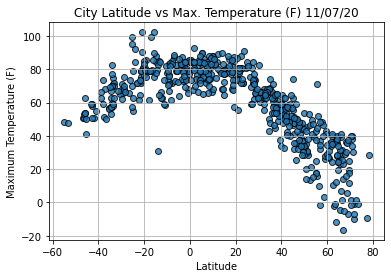

In [48]:
# Building the scatter plot
plt.title(f'City Latitude vs Max. Temperature (F) {time.strftime("%x")}')
plt.scatter(lat, max_temp,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()


### Plotting the Latitude vs Humidity

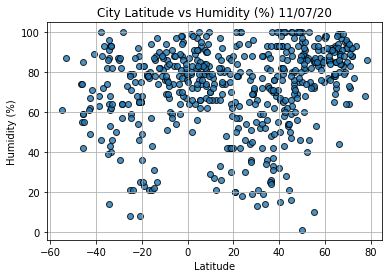

In [49]:
# Building the scatter plot
plt.title(f'City Latitude vs Humidity (%) {time.strftime("%x")}')
plt.scatter(lat, humidity,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()



### Plotting the Latitude vs Cloudiness

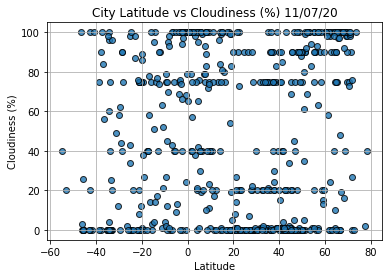

In [50]:
plt.subplot()
plt.title(f'City Latitude vs Cloudiness (%) {time.strftime("%x")}')
plt.scatter(lat, cloudiness,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()


In [51]:
# Importing the stats module
from scipy.stats import linregress

### Plotting the Latitude vs Cloudiness

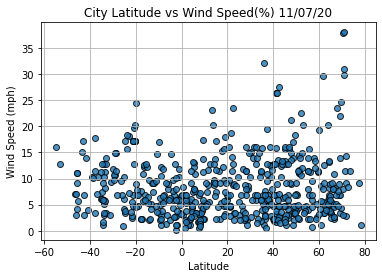

In [52]:
plt.title(f'City Latitude vs Wind Speed(%) {time.strftime("%x")}')
plt.scatter(lat, wind_speed,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()


## Custom Functions for Regression and the Plots.

In [53]:
# Function to calculate the linear regression and and get the equation of the line.
# Also get the the independent variable for each dependent variable
def linear_regression_values(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    temp_eq_line = f'y = {round(slope, 2)}(x) + {round(intercept,2)}'
    regression_list = [i*slope + intercept for i in x]
    return r_value

def linear_regression_plot(x,y, plot_title, y_label, text_coordinates):

    # Run regression on the data
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regression_list = [i*slope + intercept for i in x]
    temp_eq_line = f'y = {round(slope, 2)}(x) + {round(intercept,2)}'

    # Create the scatter plot and the Regression line plot for the data
    plt.title(plot_title, fontsize=15)
    plt.scatter(x,y, edgecolors='black')
    plt.plot(x,regression_list, color='red')

    # Labels for plot
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Annotate the graph by putting the equation of line
    plt.annotate(temp_eq_line,text_coordinates, fontsize=15, color='r')
    plt.show()

## Correlation between Latitude and Temperature.

In [55]:
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Winds
0,Hambantota,LK,2020-11-08 07:08:50,6.12,81.12,86.00,79,40,3.36
1,Provideniya,RU,2020-11-08 07:08:50,64.38,-173.30,27.95,93,100,8.23
2,Hue,VN,2020-11-08 07:08:50,16.47,107.60,80.60,74,75,11.41
3,Bluff,NZ,2020-11-08 07:08:50,-46.60,168.33,51.01,74,100,7.00
4,La Ronge,CA,2020-11-08 07:08:51,55.10,-105.28,17.60,85,100,11.41


In [54]:
# Getting the northern and southern hemisphere
north_hemisphere = city_data_df.loc[city_data_df['Latitude'] >= 0]
south_hemisphere = city_data_df.loc[city_data_df['Latitude'] < 0]

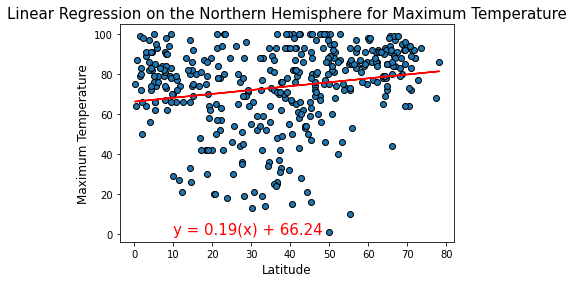

In [57]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(north_hemisphere['Latitude'], north_hemisphere['Humidity'],
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       text_coordinates=(10,0), y_label='Maximum Temperature')

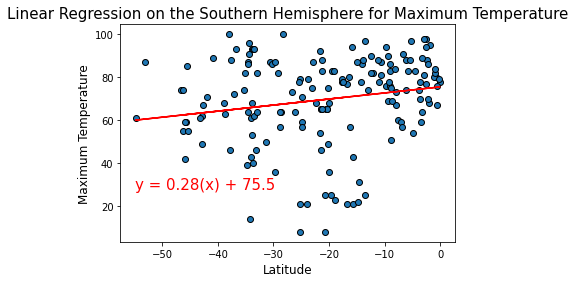

In [59]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(south_hemisphere['Latitude'], south_hemisphere['Humidity'],
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       text_coordinates=(-55,28), y_label='Maximum Temperature')


In [60]:
# R values of the regression
north_r_value = linear_regression_values(north_hemisphere['Latitude'], north_hemisphere['Humidity'])
south_r_value = linear_regression_values(south_hemisphere['Latitude'], south_hemisphere['Humidity'])
north_r_value,south_r_value

(0.19342553377600097, 0.1892760799577589)

## Correlation between Latitude and Percent Humidity.

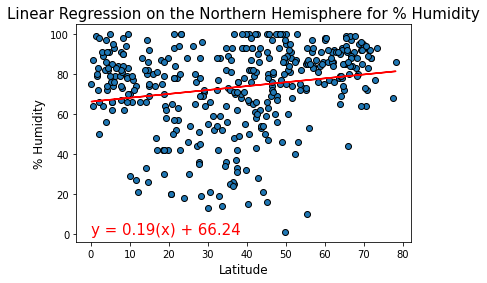

In [62]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(north_hemisphere['Latitude'], north_hemisphere['Humidity'],
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       text_coordinates=(0,0), y_label='% Humidity')

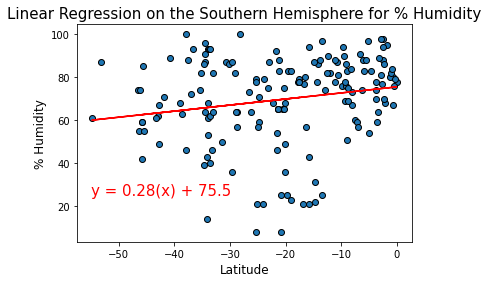

In [65]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(south_hemisphere['Latitude'], south_hemisphere['Humidity'],
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       text_coordinates=(-55,25), y_label='% Humidity')

In [66]:
# R values of the regression
north_humidity_r_value = linear_regression_values(north_hemisphere['Latitude'], north_hemisphere['Humidity'])
south_humidity_r_value = linear_regression_values(south_hemisphere['Latitude'], south_hemisphere['Humidity'])
north_humidity_r_value,south_humidity_r_value

(0.19342553377600097, 0.1892760799577589)

## Correlation between Latitude and Percent Cloudiness.

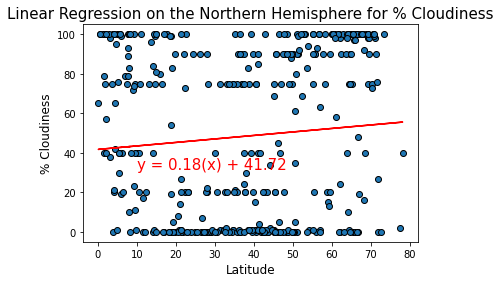

In [67]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(north_hemisphere['Latitude'], north_hemisphere['Cloudiness'],
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       text_coordinates=(10,32), y_label='% Cloudiness')

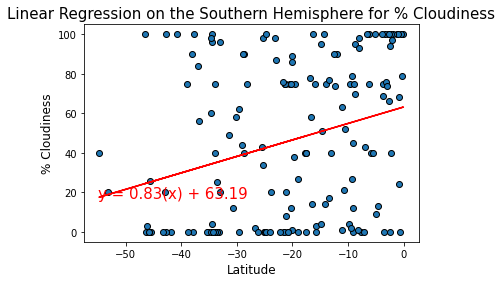

In [69]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(south_hemisphere['Latitude'], south_hemisphere['Cloudiness'],
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       text_coordinates=(-55,17), y_label='% Cloudiness')

In [68]:
# R values of the regression
north_Cloudiness_r_value = linear_regression_values(north_hemisphere['Latitude'], north_hemisphere['Cloudiness'])
south_Cloudiness_r_value = linear_regression_values(south_hemisphere['Latitude'], south_hemisphere['Cloudiness'])
north_Cloudiness_r_value,south_Cloudiness_r_value

(0.08833177405113322, 0.2912925831445173)

## Correlation between Latitude and Percent Winds.

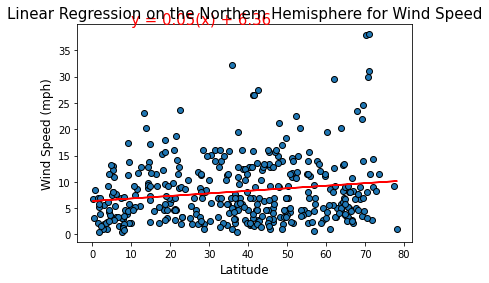

In [70]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(north_hemisphere['Latitude'], north_hemisphere['Winds'],
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       text_coordinates=(10,40), y_label='Wind Speed (mph)')

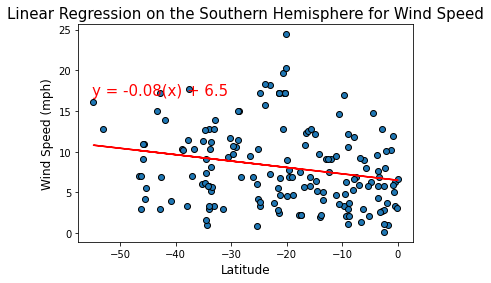

In [71]:
# Linear regression on the Northern Hemisphere
linear_regression_plot(south_hemisphere['Latitude'], south_hemisphere['Winds'],
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       text_coordinates=(-55,17), y_label='Wind Speed (mph)')

In [72]:
# R values of the regression
north_Winds_r_value = linear_regression_values(north_hemisphere['Latitude'], north_hemisphere['Winds'])
south_Winds_r_value = linear_regression_values(south_hemisphere['Latitude'], south_hemisphere['Winds'])
north_Winds_r_value,south_Winds_r_value


(0.1649665680280906, -0.21982238945122265)